In [2]:
from supervised_training import *

Using Theano backend.


In [3]:
# game variables
epochs = 10
batch_size = 10
learning_rate = 0.05
steps = 1000
training_game_size = 8


# number of epochs for training
epochs = epochs
batch_size = batch_size

# learning rate
learning_rate = learning_rate

# optimizer
optimizer = sgd(lr=learning_rate)
optimizer_str = "SGD(lr = "+str(learning_rate)+")"

# layers
layers = [{"size":5,"activation":"tanh"},
{"size":5,"activation":"tanh"}]

# number of steps to train on
steps = steps

# prepare the game for collecting data
training_game = SupervisedNaviGame(
                    training_game_size,
                    training_game_size)

# make the model
training_game.model = training_game.game_model(optimizer, layers)

# setup the game
training_game.setup()

print("Generating training data")
# collect all data to make pickled runs!
# stop regenerating the damn data!
log, inputs, targets = training_game.train_model(
            steps = steps,
            epochs = epochs,
            batch_size = batch_size,
            verbose = 1,)
# pull data points of for validation
print("Network and final validation data ready for testing.")
    # prepare the game for final validation


Generating training data
Data generated, now fitting network
Epoch 1/10
1000/1000 [==============================] - 0s - loss: 0.2932     
Epoch 2/10
1000/1000 [==============================] - 0s - loss: 0.1996     
Epoch 3/10
1000/1000 [==============================] - 0s - loss: 0.1688     
Epoch 4/10
1000/1000 [==============================] - 0s - loss: 0.1607     
Epoch 5/10
1000/1000 [==============================] - 0s - loss: 0.1573     
Epoch 6/10
1000/1000 [==============================] - 0s - loss: 0.1552     
Epoch 7/10
1000/1000 [==============================] - 0s - loss: 0.1534     
Epoch 8/10
1000/1000 [==============================] - 0s - loss: 0.1517     
Epoch 9/10
1000/1000 [==============================] - 0s - loss: 0.1498     
Epoch 10/10
1000/1000 [==============================] - 0s - loss: 0.1477     
Network and final validation data ready for testing.


In [4]:
val_game = SupervisedNaviGame(8, 8, model = training_game.model)

In [5]:
val_game.setup()

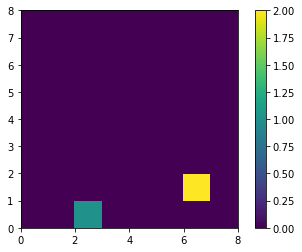

None

In [8]:
animate_game(val_game, n = 10)